<a href="https://colab.research.google.com/github/aleksandrkaplun/WineQuality/blob/main/WineClassifPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import torch
import torch.nn as nn
import torch.nn.functional as F


In [3]:
# Matplotlib settings
plt.rcParams.update({'font.size': 12})
plotSizeGen = lambda n: (16, n*9)
singlePlot = plotSizeGen(1)

In [5]:
dataset = pd.read_csv('winequality-red (1).csv', sep=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Removing outliers
dataset = dataset[dataset['total sulfur dioxide'] < 200]

<ipython-input-7-8e70efe3d5ed>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


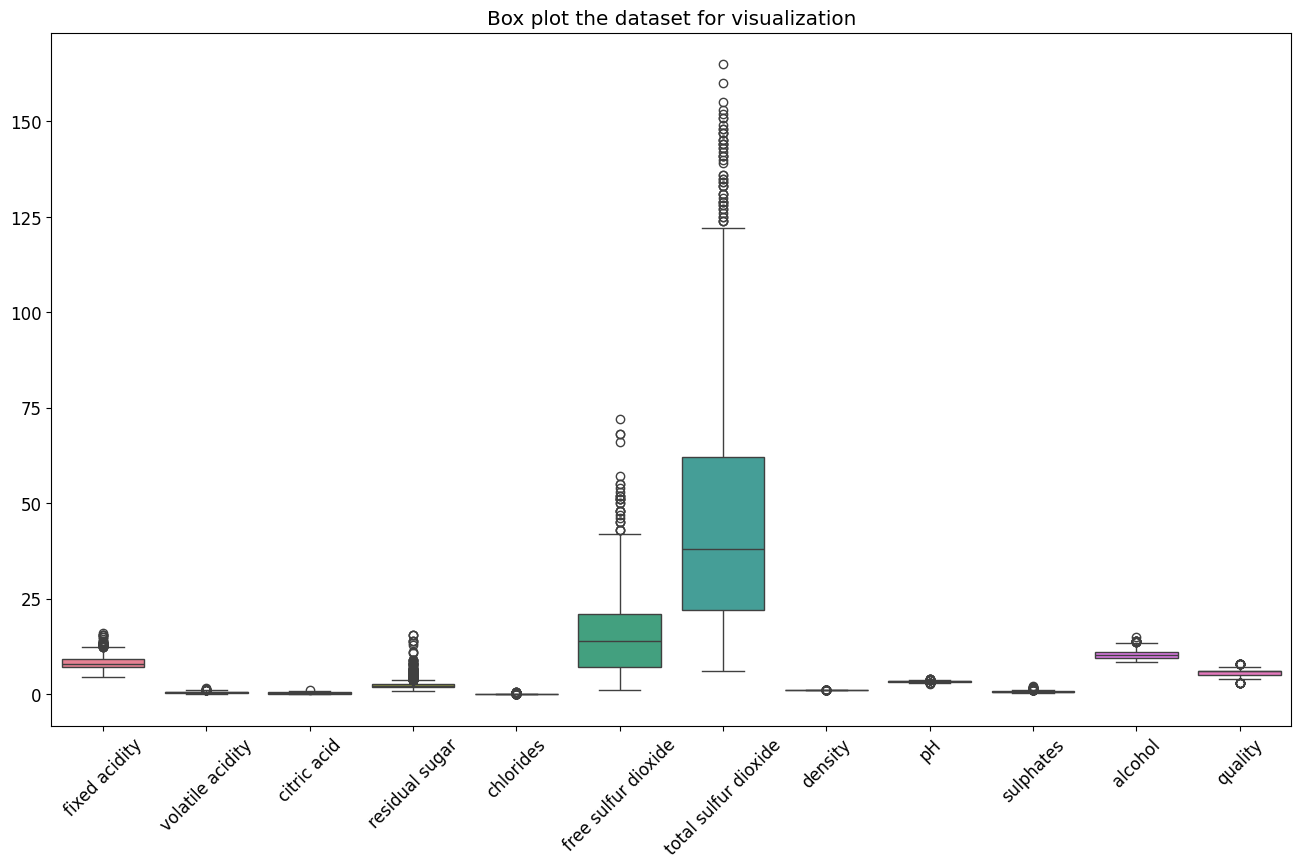

In [7]:
# Box plot the dataset for visualization

fig,ax = plt.subplots(1,1,figsize=singlePlot)

ax = sns.boxplot(dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax.set_title('Box plot the dataset for visualization')
plt.show()

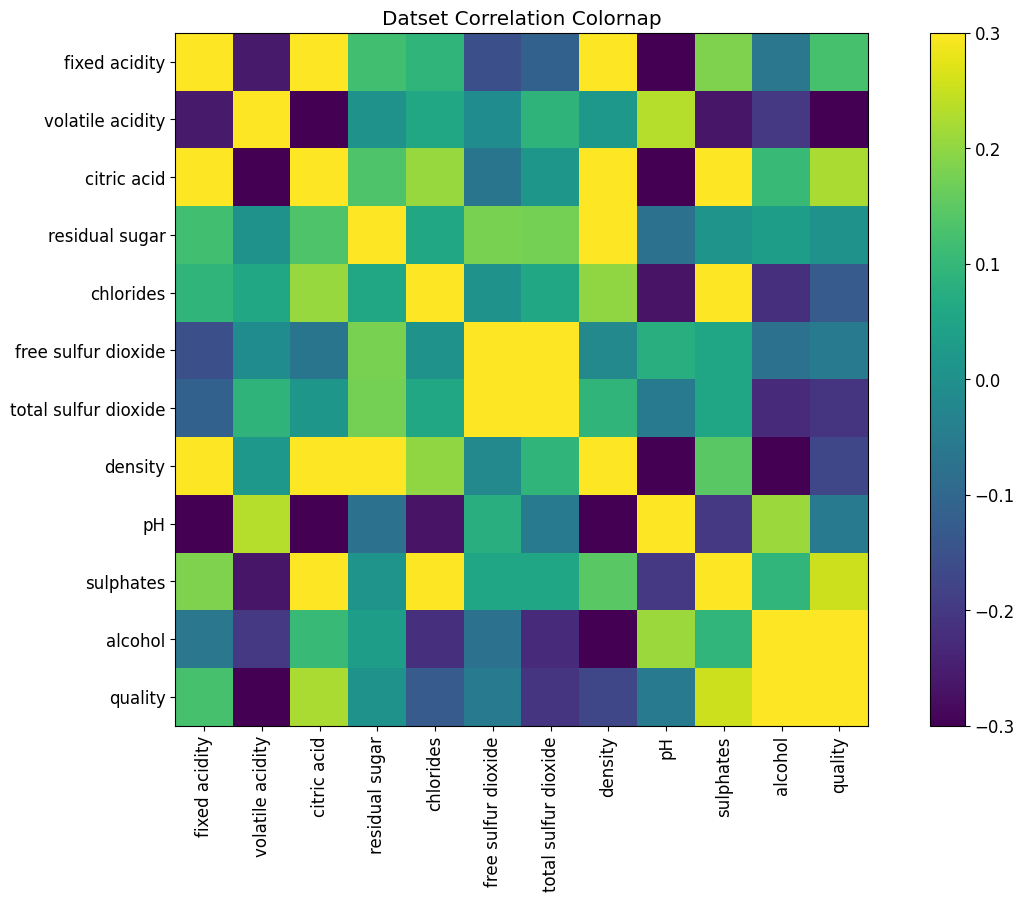

In [8]:
# Correlation Colormap
plt.figure(figsize=singlePlot)

plt.imshow(np.corrcoef(dataset.T), vmin=-.3, vmax=.3)

plt.xticks(range(len(dataset.keys())), labels=dataset.keys(), rotation=90)

plt.yticks(range(len(dataset.keys())), labels=dataset.keys())

plt.title('Datset Correlation Colornap')

plt.colorbar()

plt.show()

In [9]:
# Set columns to zscore
cols2zscore = dataset.keys()

cols2zscore = cols2zscore.drop('quality')

# Normailize the dataset using Zscore method

dataset[cols2zscore] = dataset[cols2zscore].apply(stats.zscore)
dataset.describe()

<ipython-input-9-93add6ce9303>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[cols2zscore] = dataset[cols2zscore].apply(stats.zscore)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1597.000000
mean,3.559388e-17,1.245786e-16,1.779694e-17,-9.788316e-17,-1.423755e-16,8.898469e-18,-5.339081e-17,-8.361001e-14,3.025479e-16,8.898469e-17,-5.695020e-16,5.634314
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,0.806630
min,-2.136087e+00,-2.280762e+00,-1.391823e+00,-1.169149e+00,-1.604575e+00,-1.422837e+00,-1.262581e+00,-3.546932e+00,-3.709380e+00,-1.937318e+00,-1.899221e+00,3.000000
25%,-7.006076e-01,-7.718255e-01,-9.286769e-01,-4.525789e-01,-3.721412e-01,-8.478700e-01,-7.596977e-01,-6.111392e-01,-6.587444e-01,-6.392206e-01,-8.653154e-01,5.000000
50%,-2.412541e-01,-4.530063e-02,-5.384522e-02,-2.376079e-01,-1.809014e-01,-1.770746e-01,-2.568145e-01,-6.216372e-04,-9.673073e-03,-2.261897e-01,-2.073755e-01,6.000000
75%,5.051954e-01,6.253377e-01,7.695258e-01,4.902022e-02,5.283609e-02,4.937208e-01,4.975104e-01,5.780428e-01,5.744912e-01,4.228588e-01,6.385471e-01,6.000000
max,4.352281e+00,5.878672e+00,3.754246e+00,9.292776e+00,1.112349e+01,5.380944e+00,3.734821e+00,3.683719e+00,4.533826e+00,7.916418e+00,4.210221e+00,8.000000


<ipython-input-10-2030461e8b01>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


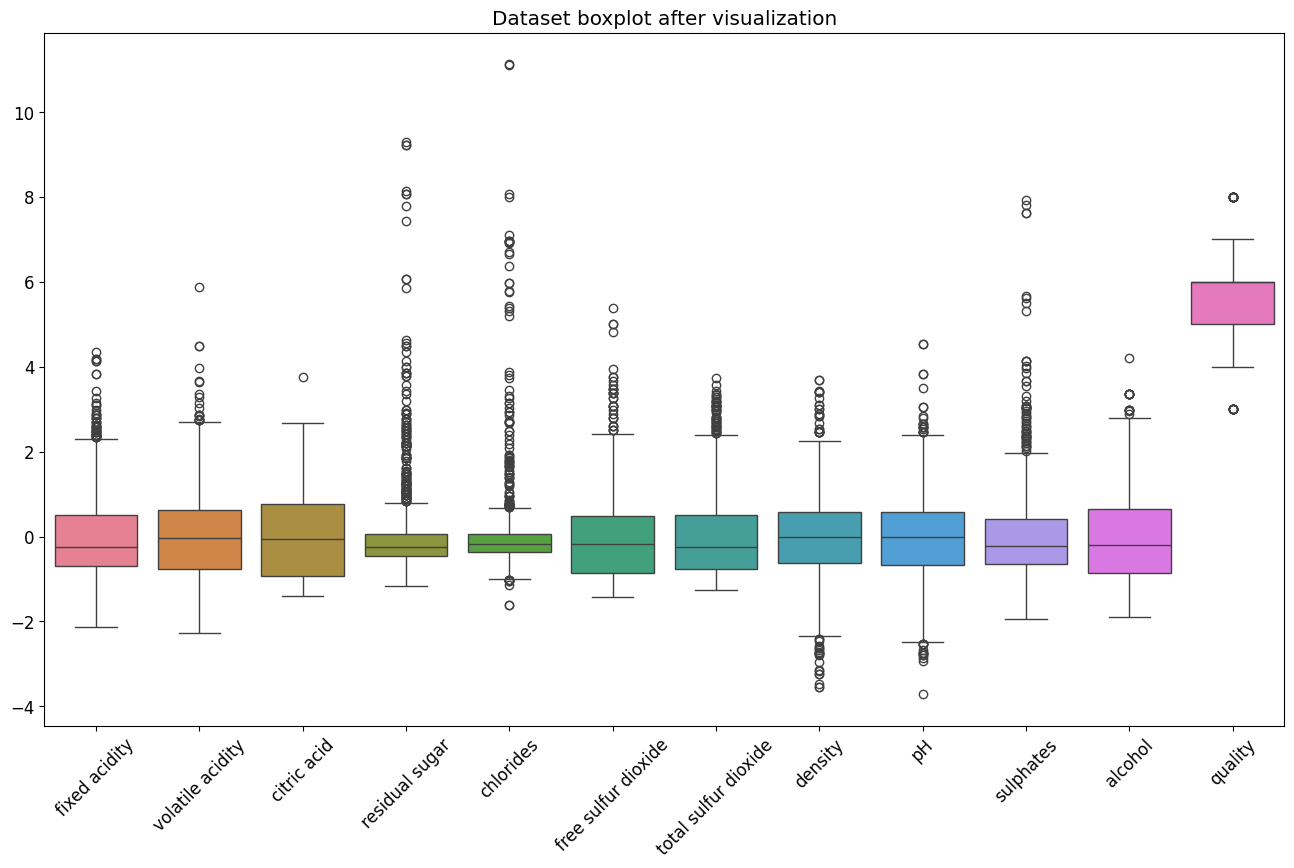

In [10]:
# Visualize the dataset to see the effects of Normalization

fig,ax = plt.subplots(1,1,figsize=(16,9))

ax = sns.boxplot(dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax.set_title('Dataset boxplot after visualization')

plt.show()

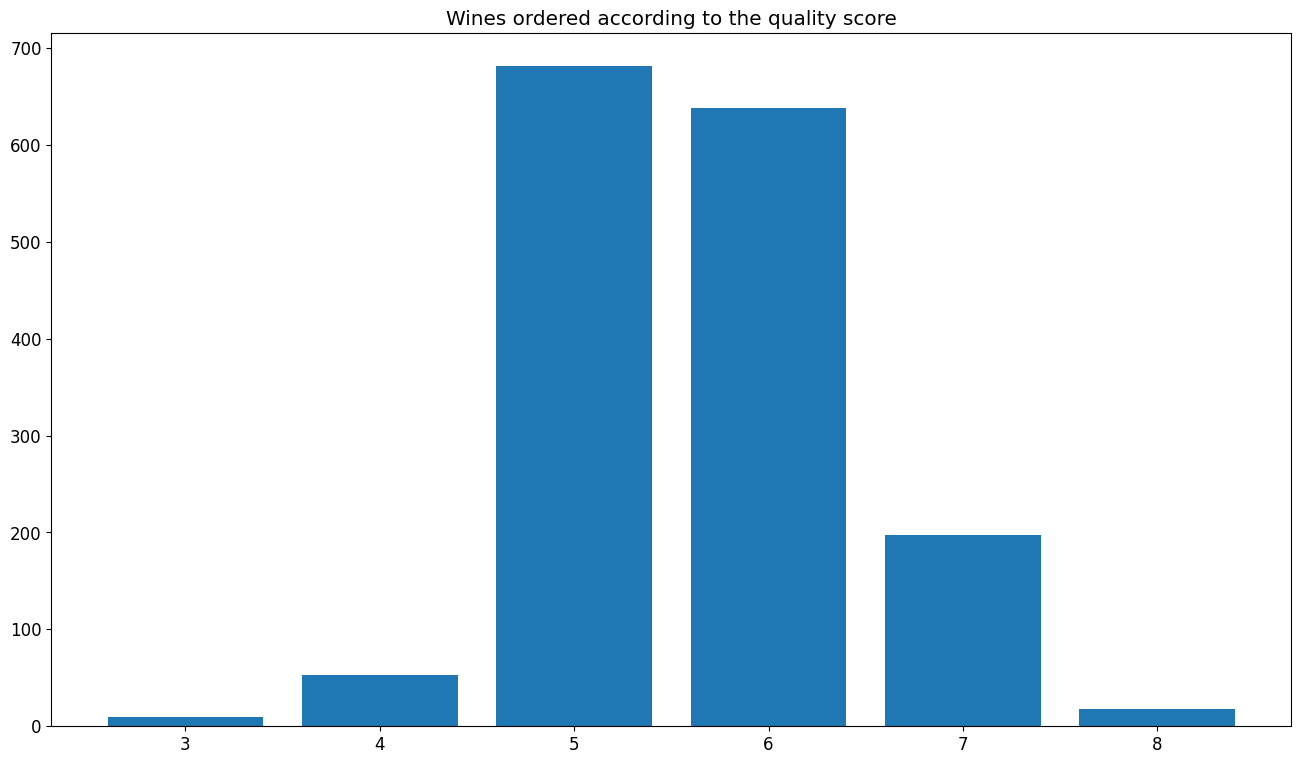

In [11]:
counts = dataset['quality'].value_counts()

title = 'Wines ordered according to the quality score'

fig,ax = plt.subplots(1,1,figsize=(16,9))

ax.bar(list(counts.keys()), counts)

ax.set_title(title)
plt.show()

In [12]:
# Add a new column distinguishing good wines

dataset[['boolQuality']] = 0

dataset['boolQuality'][dataset['quality'] > 5] = 1

<ipython-input-12-670bb5471d09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['boolQuality'][dataset['quality'] > 5] = 1


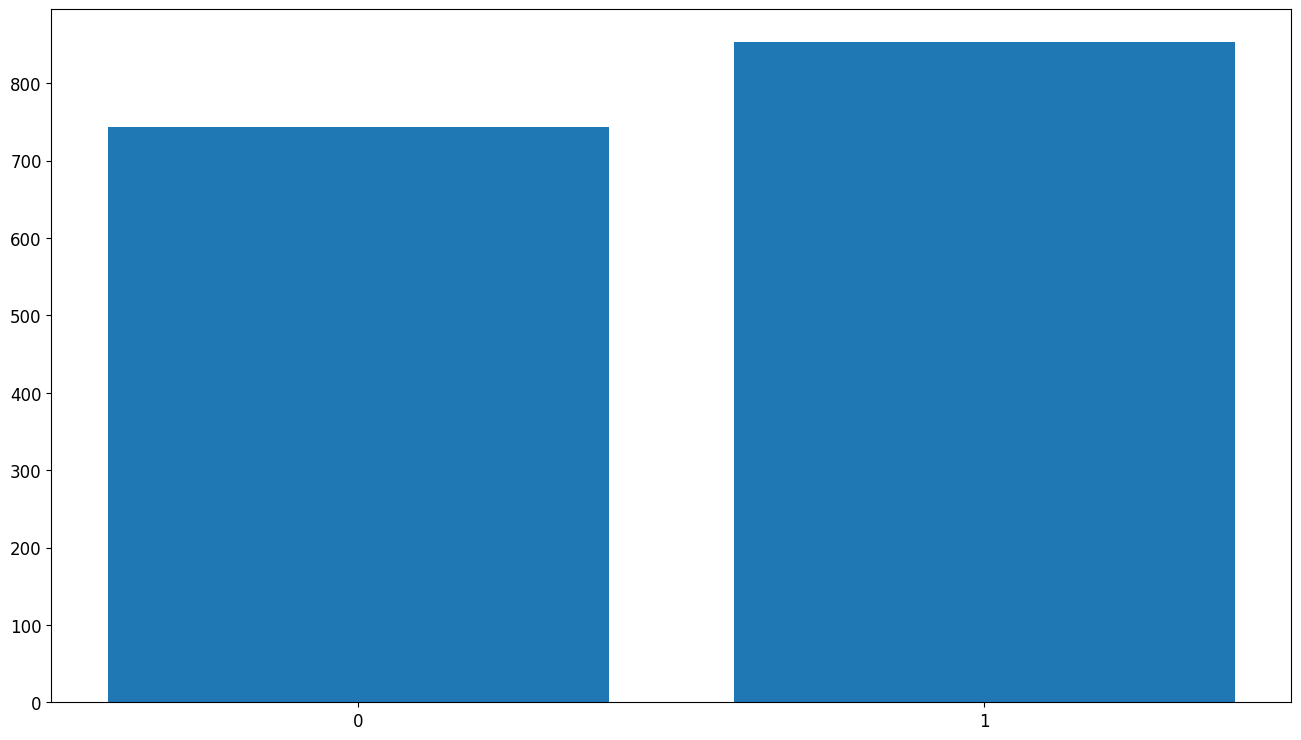

In [13]:
counts = dataset['boolQuality'].value_counts()

fig,ax = plt.subplots(1,1,figsize=(16,9))

ax.bar(list(counts.keys()), counts)

ax.set_xticks(counts.keys())

In [14]:
title = "Quality Classification - Bad(0) vs Good(1) Wines"

ax.set_title(title)

plt.show()

In [15]:
# Generate Tensors
data = torch.tensor(dataset[cols2zscore].values, dtype=torch.float32)

labels = torch.tensor(dataset[['boolQuality']].values, dtype=torch.float32)

In [16]:
print(f'Shape of data tensor:- {data.shape} and its data type:- {data.dtype}')

print(f'Shape of labels tensor:- {labels.shape} and its data type:- {labels.dtype}')

Shape of data tensor:- torch.Size([1597, 11]) and its data type:- torch.float32
Shape of labels tensor:- torch.Size([1597, 1]) and its data type:- torch.float32


In [17]:
# Split training set and test set
nTestRatio = .2

train_data,test_data,train_labels,test_labels = \
train_test_split(data, labels, test_size=nTestRatio)

In [18]:
# Generate tensor sets
training_set = TensorDataset(train_data,train_labels)

test_set = TensorDataset(test_data, test_labels)

In [19]:
# Set batch sizes
nTrainingSize = 64

nTestSize = test_set.tensors[0].shape[0]

In [20]:
train_loader = DataLoader(training_set, shuffle=True, batch_size=nTrainingSize, drop_last=True)

test_loader = DataLoader(test_set, batch_size=nTestSize)

In [21]:
# Set metaparameters
epochs = 250

learning_rate = 0.01

l1_lambda = 0.01

In [22]:
accScoreCalculator = \
lambda yhat,y: 100 * torch.mean(((yhat > 0).float() == y).float()).item()

In [23]:
# Create model class
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.inputLayer = nn.Linear(11,55)
        self.hiddenLayers = nn.ModuleDict()
        self.hiddenLayers['layer1'] = nn.Linear(55,55)
        self.hiddenLayers['layer2'] = nn.Linear(55,55)
        self.outputLayer = nn.Linear(55,1)
    def forward(self,x):
        x = F.leaky_relu(self.inputLayer(x))
        for layer in self.hiddenLayers:
            x = F.leaky_relu(self.hiddenLayers[layer](x))
        x = self.outputLayer(x)
        return x

In [24]:
# Instantiate model, loss function, optimizer and scheduler
model = Model()
lossfunc = nn.BCEWithLogitsLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
nStepSize = nTrainingSize * len(train_loader)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=nStepSize, gamma=.1)

# Calculate number of weights in the model for L1 Regularization
nWeights = 0
for key,value in model.named_parameters():
    if 'bias' not in key:
        numel = value.numel()
        nWeights += numel
print(f'Number of weights in the model:- {nWeights}')

Number of weights in the model:- 6710


In [25]:
losses = []

trainAcc = []

testAcc = []

lrSteps = []

In [26]:
# Train the model
for i in range(epochs):
    batchLosses = []
    batchAcc = []
    for X,y in train_loader:
        # Forward propagation
        yhat = model(X)

        # Calculate loss
        loss = lossfunc(yhat,y)

        # L1 Regulariztion starts
        L1_term = 0
        for key,value in model.named_parameters():
            if 'bias' not in key:
                weights_sum = torch.sum(torch.abs(value))
                L1_term = L1_term + weights_sum
        L1_term = L1_term / nWeights
        loss = loss - l1_lambda * L1_term
        # L1 Regularization Ends

        # Add loss to batch losses
        loss_item = loss.detach().item()
        batchLosses.append(loss_item)

        # Backward Propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        last_lr_step_size = scheduler.get_last_lr()
        lrSteps.append(last_lr_step_size[0])

        # Calculate Batch Accuracy
        batchScore = accScoreCalculator(yhat,y)
        batchAcc.append(batchScore)

    # Calculate Loss
    loss = np.mean(batchLosses)
    losses.append(loss)

    # Calculate Training Accuracy
    trainScore = np.mean(batchAcc)
    trainAcc.append(trainScore)

    # Evaluate model (оцениваем по тестовому множеству)
    model.eval()
    X,y = next(iter(test_loader))
    with torch.no_grad():
         yhat = model(X)
    testScore = accScoreCalculator(yhat,y)
    testAcc.append(testScore)
    model.train()

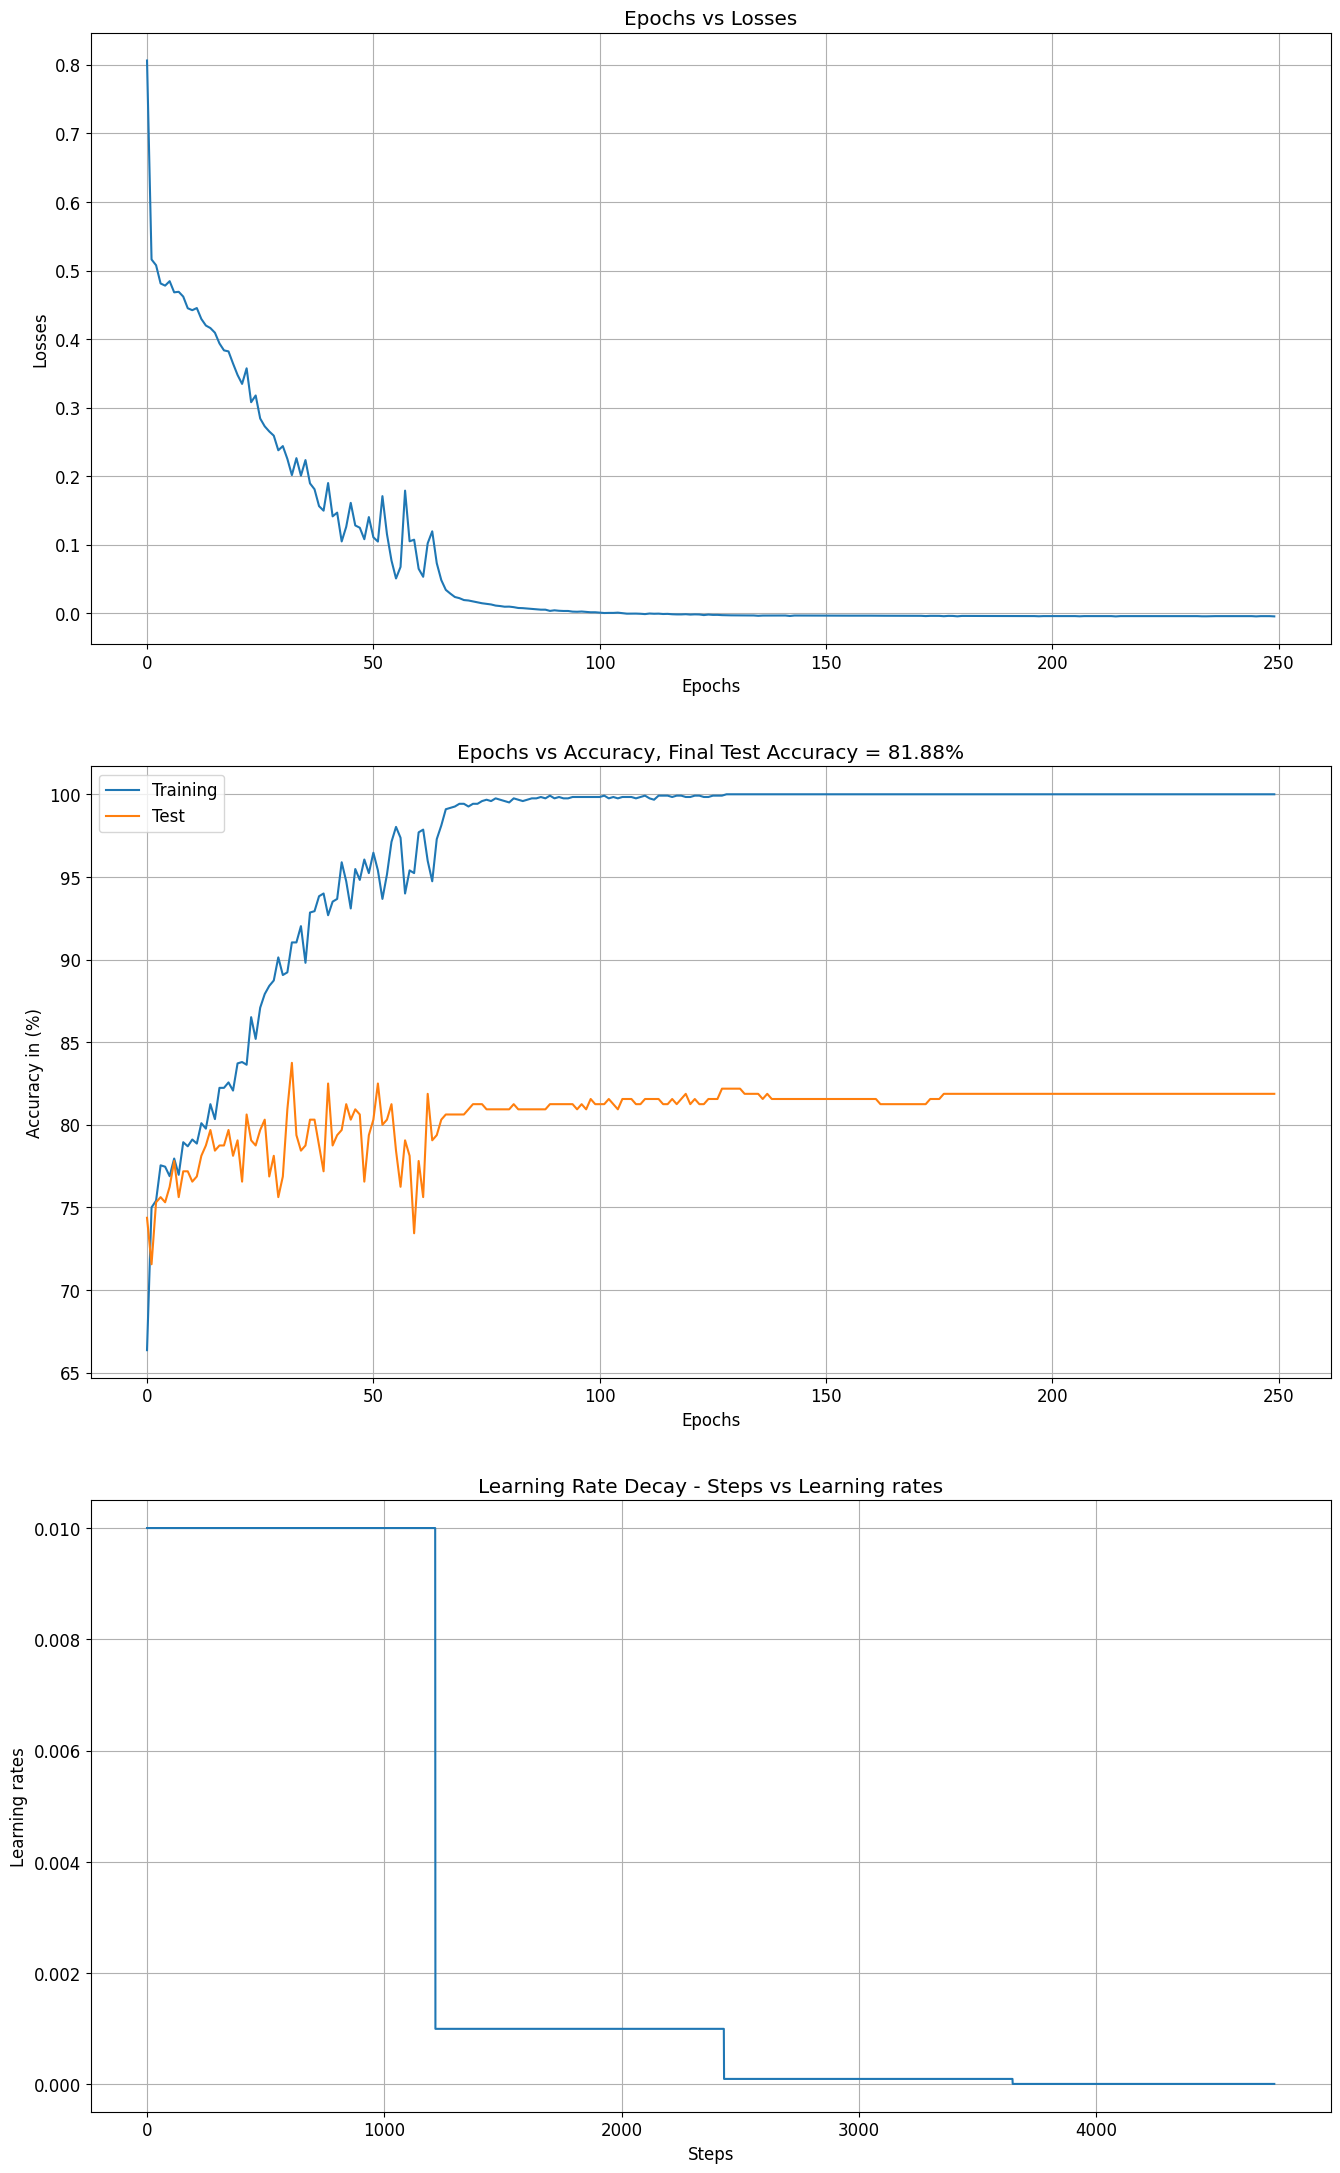

In [29]:
# Plot Graphs:-
nPlots = 3
plotSize = plotSizeGen(nPlots)
fig,ax = plt.subplots(nPlots,1,figsize=plotSize)

# Graph 1:- Epochs vs Losses
ax[0].plot(losses)
ax[0].set_title('Epochs vs Losses')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Losses')

# Graph 2:- Epochs vs Accuracy
ax[1].plot(trainAcc, label='Training')
ax[1].plot(testAcc, label='Test')
title = f'Epochs vs Accuracy, Final Test Accuracy = {round(testAcc[-1],2)}%'
ax[1].set_title(title)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy in (%)')
ax[1].legend()

# Graph 3:- Steps vs Learning rates
ax[2].plot(lrSteps)
title = 'Learning Rate Decay - Steps vs Learning rates'
ax[2].set_title(title)
ax[2].set_xlabel('Steps')
ax[2].set_ylabel('Learning rates')

for i in range(nPlots):
    ax[i].grid()

plt.show()

In [30]:
def wine_quality_classifier(input):
    # Error Handling
    if len(input) != 11:
        raise Exception('Invalid length for input params')
    for i,elements in enumerate(input):
        if type(elements) != int and type(elements) != float:
            part1 = f'Invalid data type at index {i} '
            part2 = f'of your input list, entered value = {elements}'
            raise Exception(part1 + part2)
    # Evaluate Input
    data = torch.tensor(input, dtype=torch.float32)
    pred = model(data)
    if pred > 0:
        return 'Good'
    else:
        return 'Bad'

In [31]:
inputArr = [-0.528350,0.960657,-1.391823,-0.452579,-0.244648,-0.464558,-0.382535,0.556807,1.288470,-0.580216,-0.959307]

In [33]:
pred = wine_quality_classifier(inputArr)

pred

'Bad'